### SiC MOSFET - C2M0080120D
#### Ouliers Analysis and Removal using KDE and Box plots Visualisation 

- KDE plots
- Boxplots
- IQR-based outlier counts per column
(Optional exploring -Apply KMeans clustering, PCA)

*And final plotting and Detailed Summary Analysis of IQR-based outlier counts per column*

Loaded: mosfets_step2_no_zeros/C2M0080120D_no_zeros.csv with 404943 rows

KDE plots:


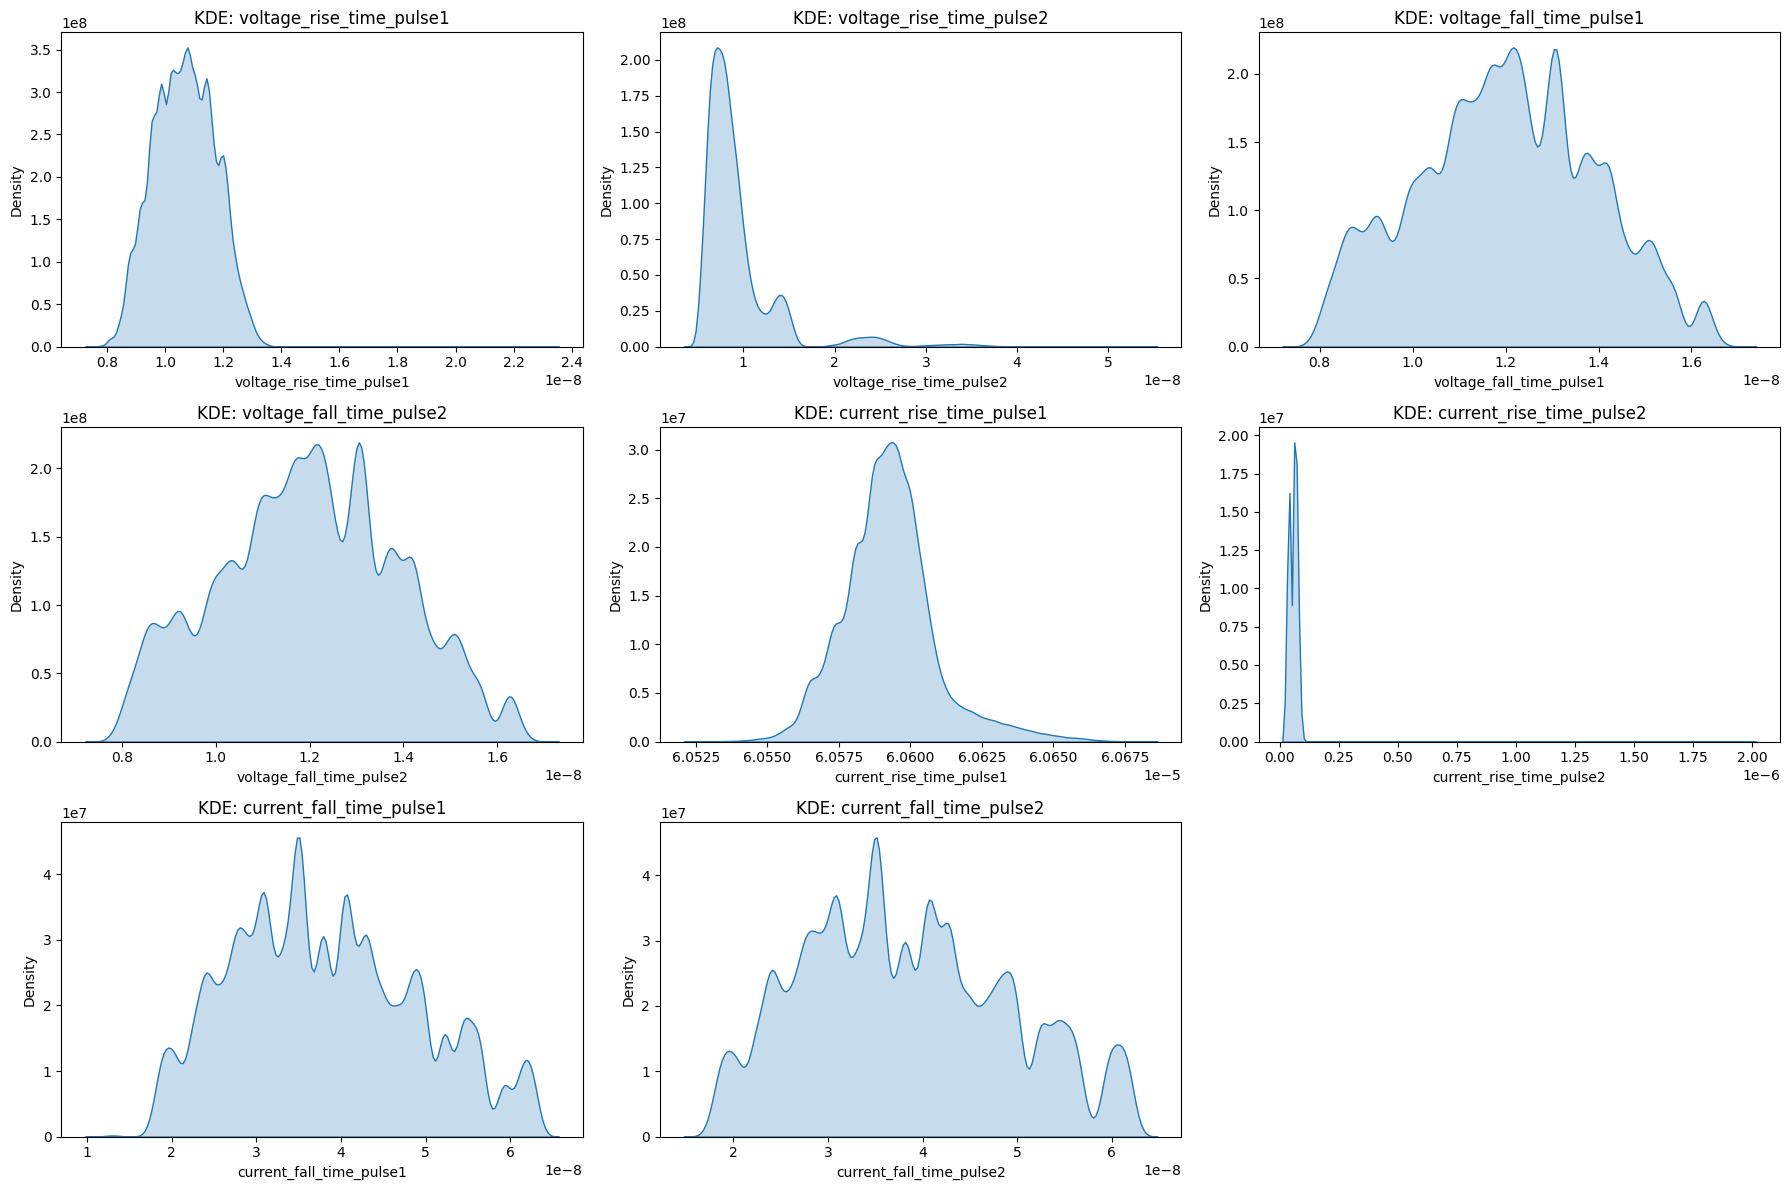

Boxplots:


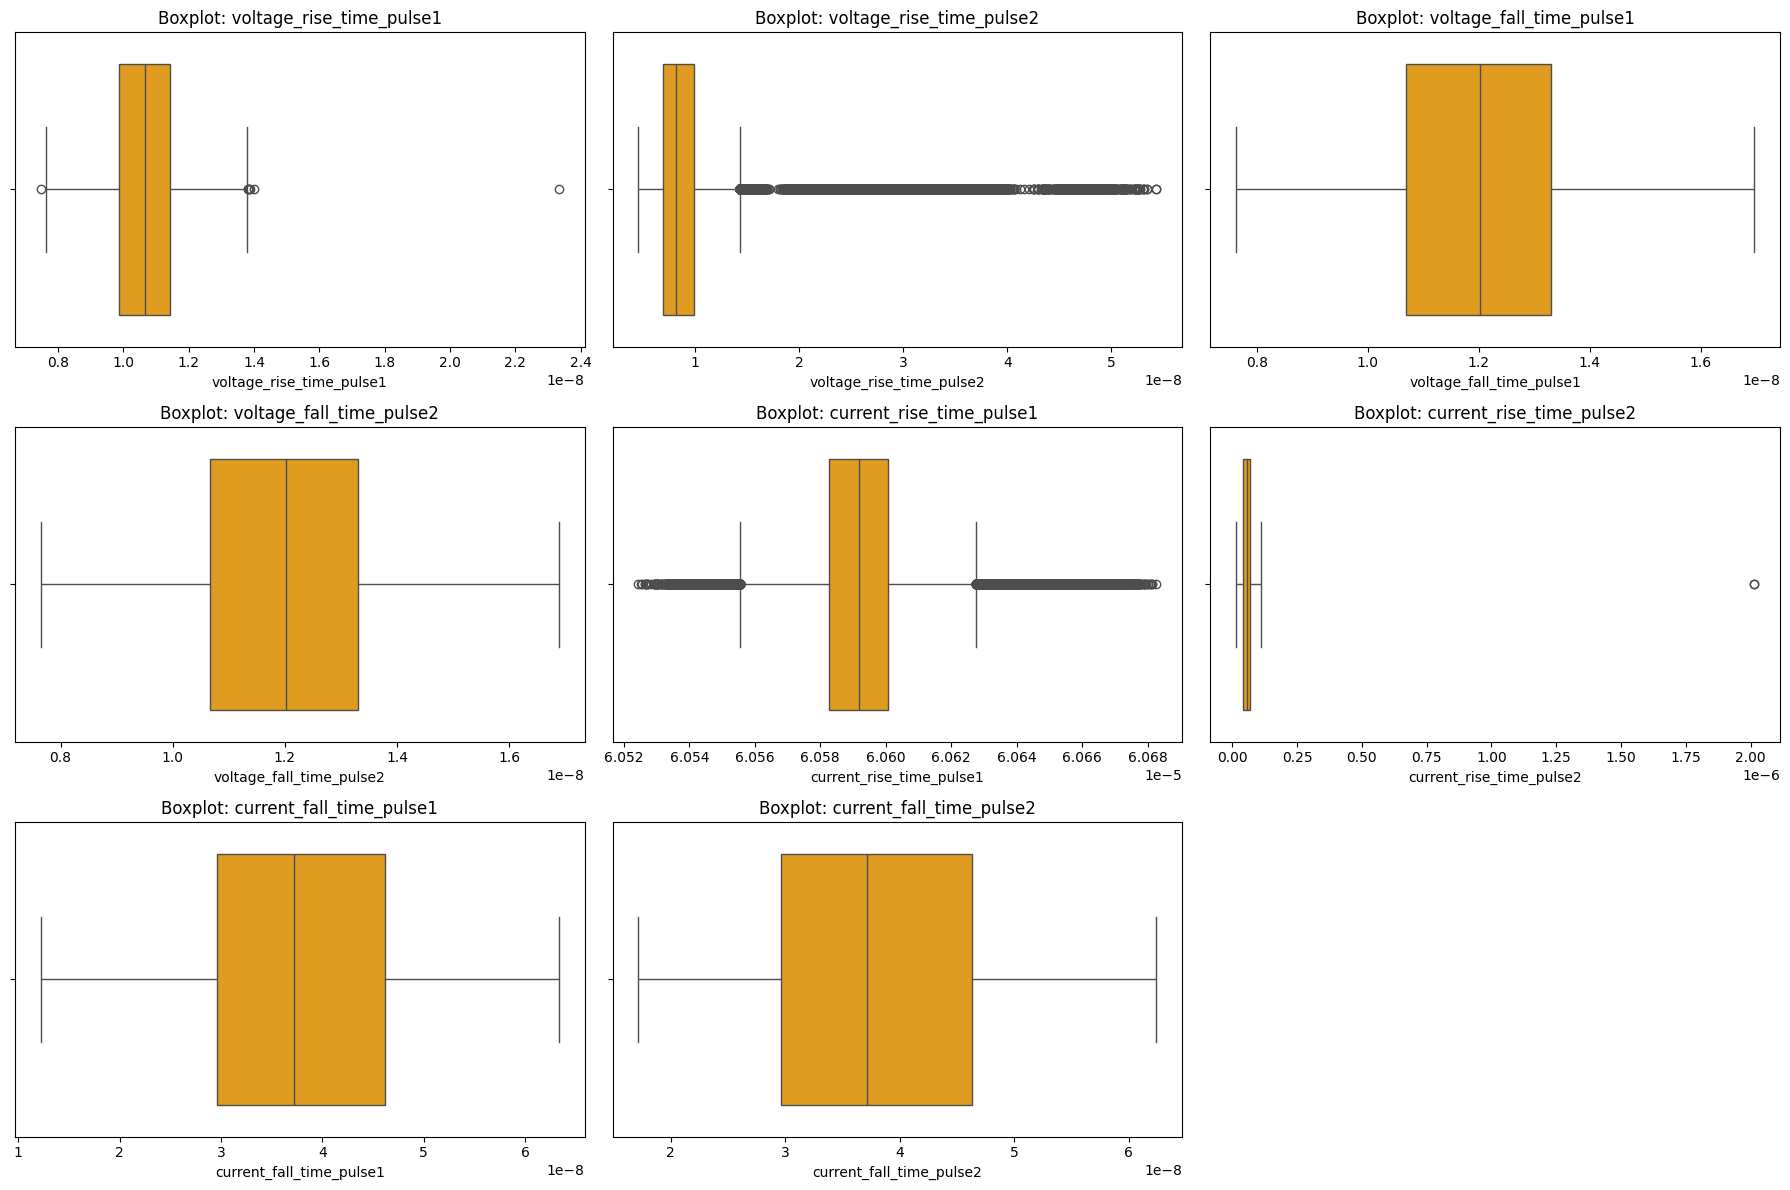

,count,mean,std,min,25%,50%,75%,max,range
voltage_rise_time_pulse1,404943.0,1.070000e-08,1.000000e-09,7.500000e-09,9.900000e-09,1.070000e-08,1.140000e-08,2.330000e-08,1.590000e-08
voltage_rise_time_pulse2,404943.0,9.400000e-09,4.700000e-09,4.500000e-09,6.900000e-09,8.100000e-09,9.900000e-09,5.430000e-08,4.980000e-08
voltage_fall_time_pulse1,404943.0,1.200000e-08,1.900000e-09,7.600000e-09,1.070000e-08,1.200000e-08,1.330000e-08,1.700000e-08,9.300000e-09
voltage_fall_time_pulse2,404943.0,1.200000e-08,1.900000e-09,7.600000e-09,1.070000e-08,1.200000e-08,1.330000e-08,1.690000e-08,9.200000e-09
current_rise_time_pulse1,404943.0,6.059260e-05,1.650000e-08,6.052450e-05,6.058250e-05,6.059190e-05,6.060060e-05,6.068270e-05,1.582000e-07
current_rise_time_pulse2,404943.0,5.650000e-08,1.890000e-08,1.550000e-08,4.010000e-08,5.870000e-08,6.990000e-08,2.013900e-06,1.998300e-06
current_fall_time_pulse1,404943.0,3.820000e-08,1.090000e-08,1.220000e-08,2.960000e-08,3.720000e-08,4.610000e-08,6.330000e-08,5.110000e-08
current_fall_time_pulse2,404943.0,3.820000e-08,1.080000e-08,1.720000e-08,2.970000e-08,3.720000e-08,4.630000e-08,6.240000e-08,4.520000e-08


IQR-based outlier counts per column:

voltage_rise_time_pulse1: 7 outliers
voltage_rise_time_pulse2: 34579 outliers
voltage_fall_time_pulse1: 0 outliers
voltage_fall_time_pulse2: 0 outliers
current_rise_time_pulse1: 17939 outliers
current_rise_time_pulse2: 2 outliers
current_fall_time_pulse1: 0 outliers
current_fall_time_pulse2: 0 outliers


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

FILE_PATH = "mosfets_step2_no_zeros/C2M0080120D_no_zeros.csv"  # Replace with other MOSFET file
df = pd.read_csv(FILE_PATH)

# Loading the dataset of the mosfet C2M0025120D to remove the outliers 
time_columns = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2'
]
# Just a quick display to check the right file and the rows 
print(f"Loaded: {FILE_PATH} with {len(df)} rows\n")

# KDE plotting for understanding the distribution and outliers
print("KDE plots:")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(time_columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(f"KDE: {col}")
for j in range(len(time_columns), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Boxplots
print("Boxplots:")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(time_columns):
    sns.boxplot(x=df[col], ax=axes[i], color='orange')
    axes[i].set_title(f"Boxplot: {col}")
for j in range(len(time_columns), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Adding the range and min and max to check 
describe_df = df[time_columns].describe().T
describe_df["range"] = describe_df["max"] - describe_df["min"]
display(describe_df.round(10))

# VERY IMPOTANT FOR UNDERSTANDING THE DISTRIBUTION
print("IQR-based outlier counts per column:\n")
for col in time_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


In [2]:
# the rows to drop
vrt1_Q1, vrt1_Q3 = df['voltage_rise_time_pulse1'].quantile([0.25, 0.75])
crt2_Q1, crt2_Q3 = df['current_rise_time_pulse2'].quantile([0.25, 0.75])
vrt1_IQR = vrt1_Q3 - vrt1_Q1
crt2_IQR = crt2_Q3 - crt2_Q1

vrt1_lower = vrt1_Q1 - 1.5 * vrt1_IQR
vrt1_upper = vrt1_Q3 + 1.5 * vrt1_IQR
crt2_lower = crt2_Q1 - 1.5 * crt2_IQR
crt2_upper = crt2_Q3 + 1.5 * crt2_IQR

df_cleaned = df[
    (df['voltage_rise_time_pulse1'].between(vrt1_lower, vrt1_upper)) &
    (df['current_rise_time_pulse2'].between(crt2_lower, crt2_upper))
]
print(f"Cleaned data shape: {df_cleaned.shape}")


Cleaned data shape: (404934, 50)


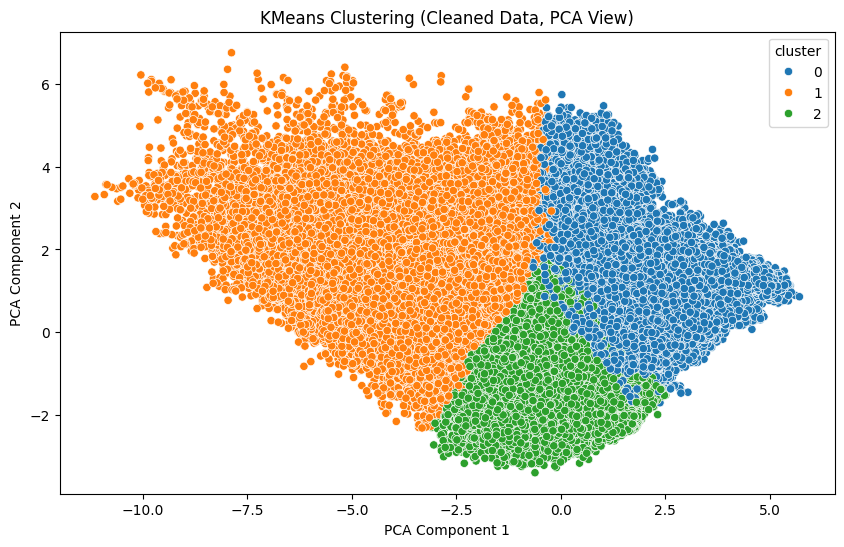


EMI Mean per Cluster:
         overshoot_pulse_1  overshoot_pulse_2  undershoot_pulse_1  \
cluster                                                             
0                  54.4958            38.9223            -36.3601   
1                  70.7805            81.9768            -55.8635   
2                  50.4692            48.9974            -39.1529   

         undershoot_pulse_2  ringing_frequency_MHz  
cluster                                             
0                  -36.3765                72.7139  
1                  -55.8029                74.3282  
2                  -39.2112                69.5792  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Again the times columns 
time_cols = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2'
]
# The EMI - overshoot undershoot and the rining frquency solumns to compare
emi_cols = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz'
]

# Removing only the 7 outliers
Q1 = df['voltage_rise_time_pulse1'].quantile(0.25)
Q3 = df['voltage_rise_time_pulse1'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Preparing the data for clustering
features_for_clustering = time_cols + emi_cols
data = df_cleaned[features_for_clustering].dropna()

# Sclainf
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3 clusters with KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['cluster'] = clusters
# PCA Visualisations
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['pca1'] = pca_result[:, 0]
data['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title("KMeans Clustering (Cleaned Data, PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


print("\nEMI Mean per Cluster:")
print(data.groupby("cluster")[emi_cols].mean().round(4))


KDE plots for EMI columns:


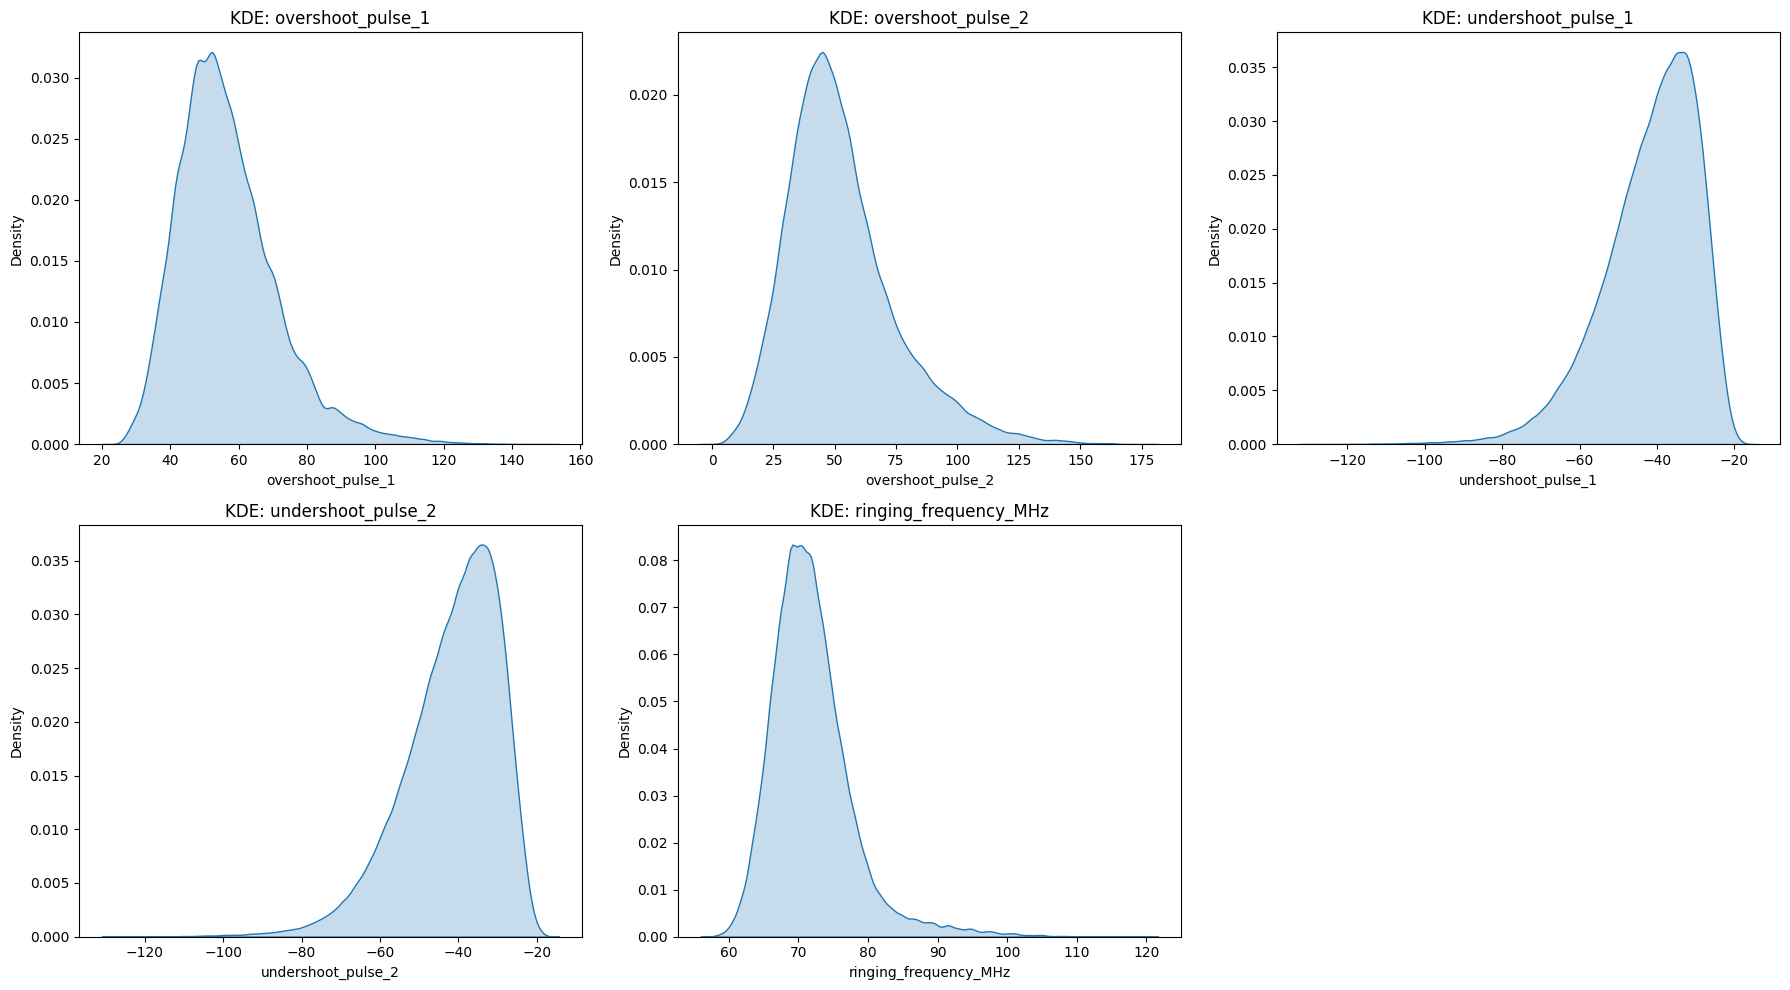

BOxplots for EMI columns:


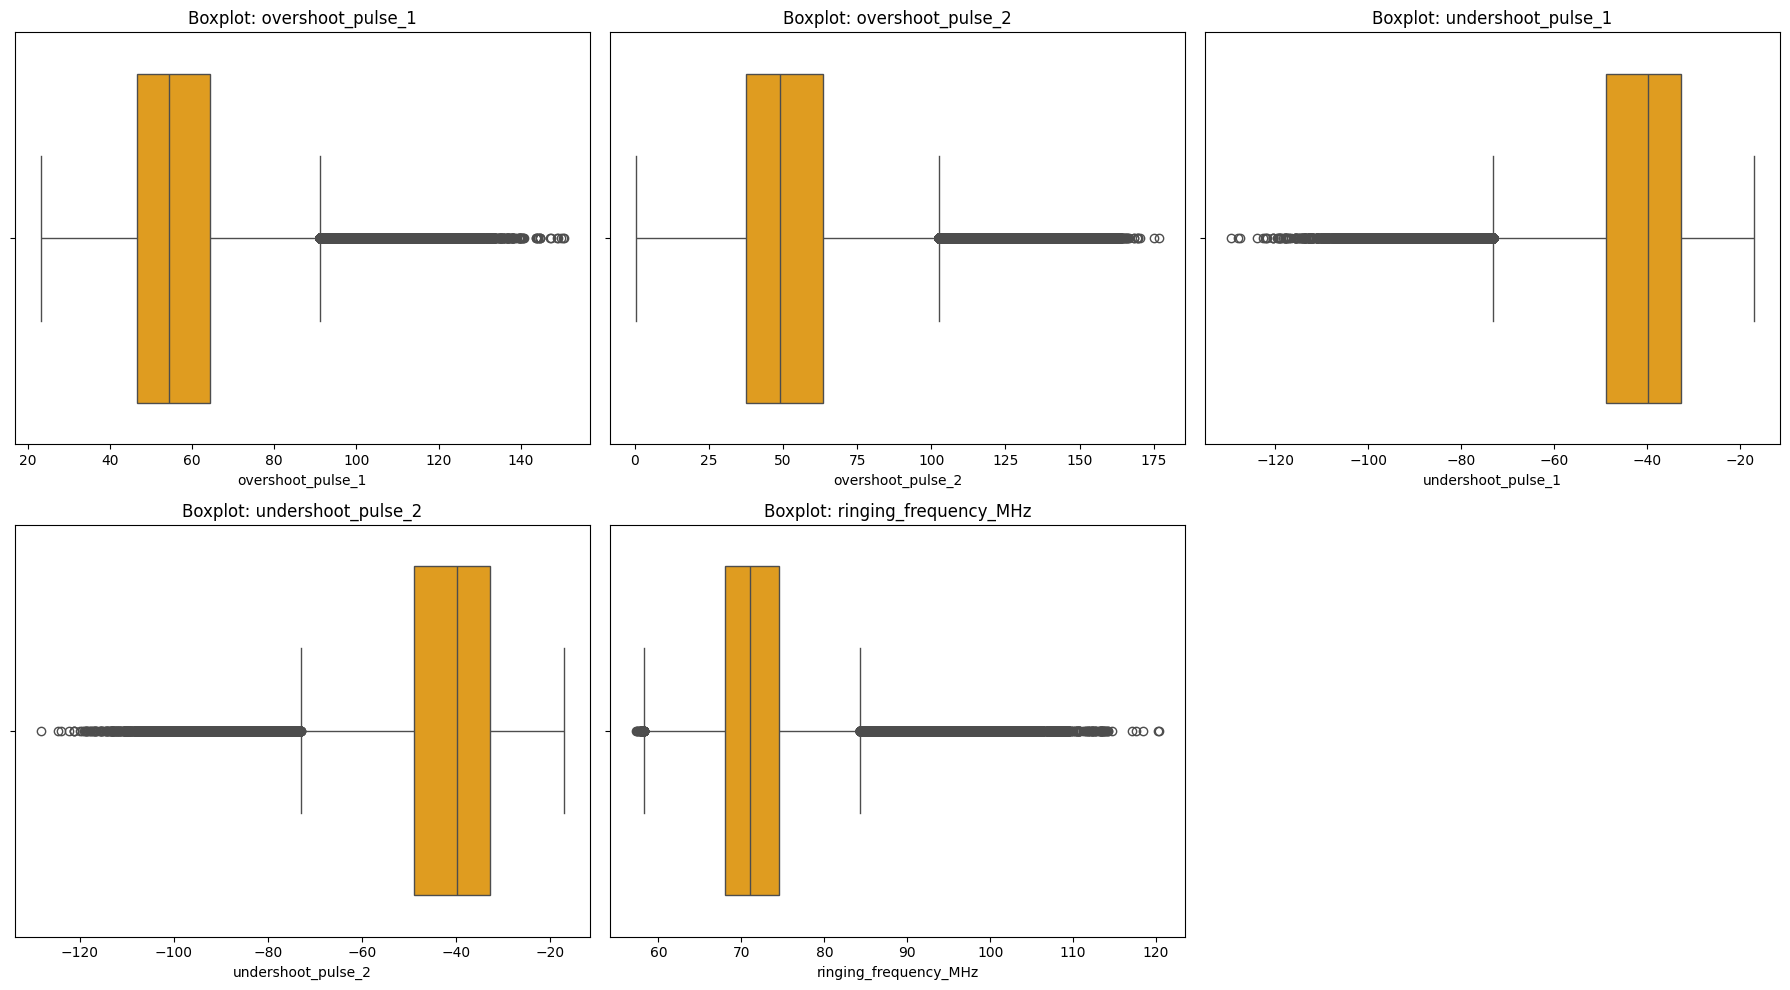

,count,mean,std,min,25%,50%,75%,max,range
overshoot_pulse_1,404934.0,56.6449,14.6410,23.2374,46.5128,54.4410,64.3591,150.4954,127.2579
overshoot_pulse_2,404934.0,52.5426,22.1456,0.3684,37.4220,48.8613,63.4682,176.7716,176.4032
undershoot_pulse_1,404934.0,-41.8514,12.3029,-129.5338,-48.8198,-39.7548,-32.6912,-16.9477,112.5861
undershoot_pulse_2,404934.0,-41.8665,12.2614,-128.2788,-48.8499,-39.7719,-32.7165,-17.0196,111.2592
ringing_frequency_MHz,404934.0,71.8789,5.9517,57.2892,68.0296,71.0607,74.5495,120.3357,63.0465


IQR-based outlier counts for EMI columns:

overshoot_pulse_1: 11403 outliers
overshoot_pulse_2: 13395 outliers
undershoot_pulse_1: 7637 outliers
undershoot_pulse_2: 7495 outliers
ringing_frequency_MHz: 15350 outliers


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#EMI columns
emi_cols = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz'
]

# KDE plots
print("KDE plots for EMI columns:")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(emi_cols):
    sns.kdeplot(df_cleaned[col], ax=axes[i], fill=True)
    axes[i].set_title(f"KDE: {col}")

for j in range(len(emi_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Boxplots
print("BOxplots for EMI columns:")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(emi_cols):
    sns.boxplot(x=df_cleaned[col], ax=axes[i], color='orange')
    axes[i].set_title(f"Boxplot: {col}")

for j in range(len(emi_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

describe_emi = df_cleaned[emi_cols].describe().T
describe_emi["range"] = describe_emi["max"] - describe_emi["min"]
display(describe_emi.round(4))


print("IQR-based outlier counts for EMI columns:\n")
for col in emi_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


In [6]:

col = 'current_rise_time_pulse2'

Q1 = df_cleaned[col].quantile(0.25)
Q3 = df_cleaned[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
print(f"Outliers removed from '{col}'. New shape: {df_cleaned.shape}")

Outliers removed from 'current_rise_time_pulse2'. New shape: (404934, 50)


FINAL CHECK 

Null Value Count Per Target Column:
Series([], dtype: int64)

Negative Value Count (Rise/Fall Columns Only):
Series([], dtype: int64)

Final IQR-based Outlier Summary:


,min,max,iqr_lower,iqr_upper,outliers,range
overshoot_pulse_1,2.323743e+01,1.504954e+02,1.974337e+01,9.112856e+01,11403.0,1.272579e+02
overshoot_pulse_2,3.684082e-01,1.767716e+02,-1.647186e+00,1.025374e+02,13395.0,1.764032e+02
undershoot_pulse_1,-1.295338e+02,-1.694775e+01,-7.301269e+01,-8.498277e+00,7637.0,1.125861e+02
undershoot_pulse_2,-1.282788e+02,-1.701960e+01,-7.305009e+01,-8.516267e+00,7495.0,1.112592e+02
ringing_frequency_MHz,5.728921e+01,1.203357e+02,5.824984e+01,8.432923e+01,15350.0,6.304650e+01
voltage_rise_time_pulse1,7.643545e-09,1.377279e-08,7.514392e-09,1.378896e-08,0.0,6.129245e-09
voltage_rise_time_pulse2,4.532248e-09,5.432866e-08,2.502248e-09,1.429609e-08,34578.0,4.979641e-08
voltage_fall_time_pulse1,7.630563e-09,1.696266e-08,6.751416e-09,1.723480e-08,0.0,9.332098e-09
voltage_fall_time_pulse2,7.646036e-09,1.688481e-08,6.720399e-09,1.724485e-08,0.0,9.238777e-09
current_rise_time_pulse1,6.052445e-05,6.068266e-05,6.055545e-05,6.062768e-05,17938.0,1.582081e-07


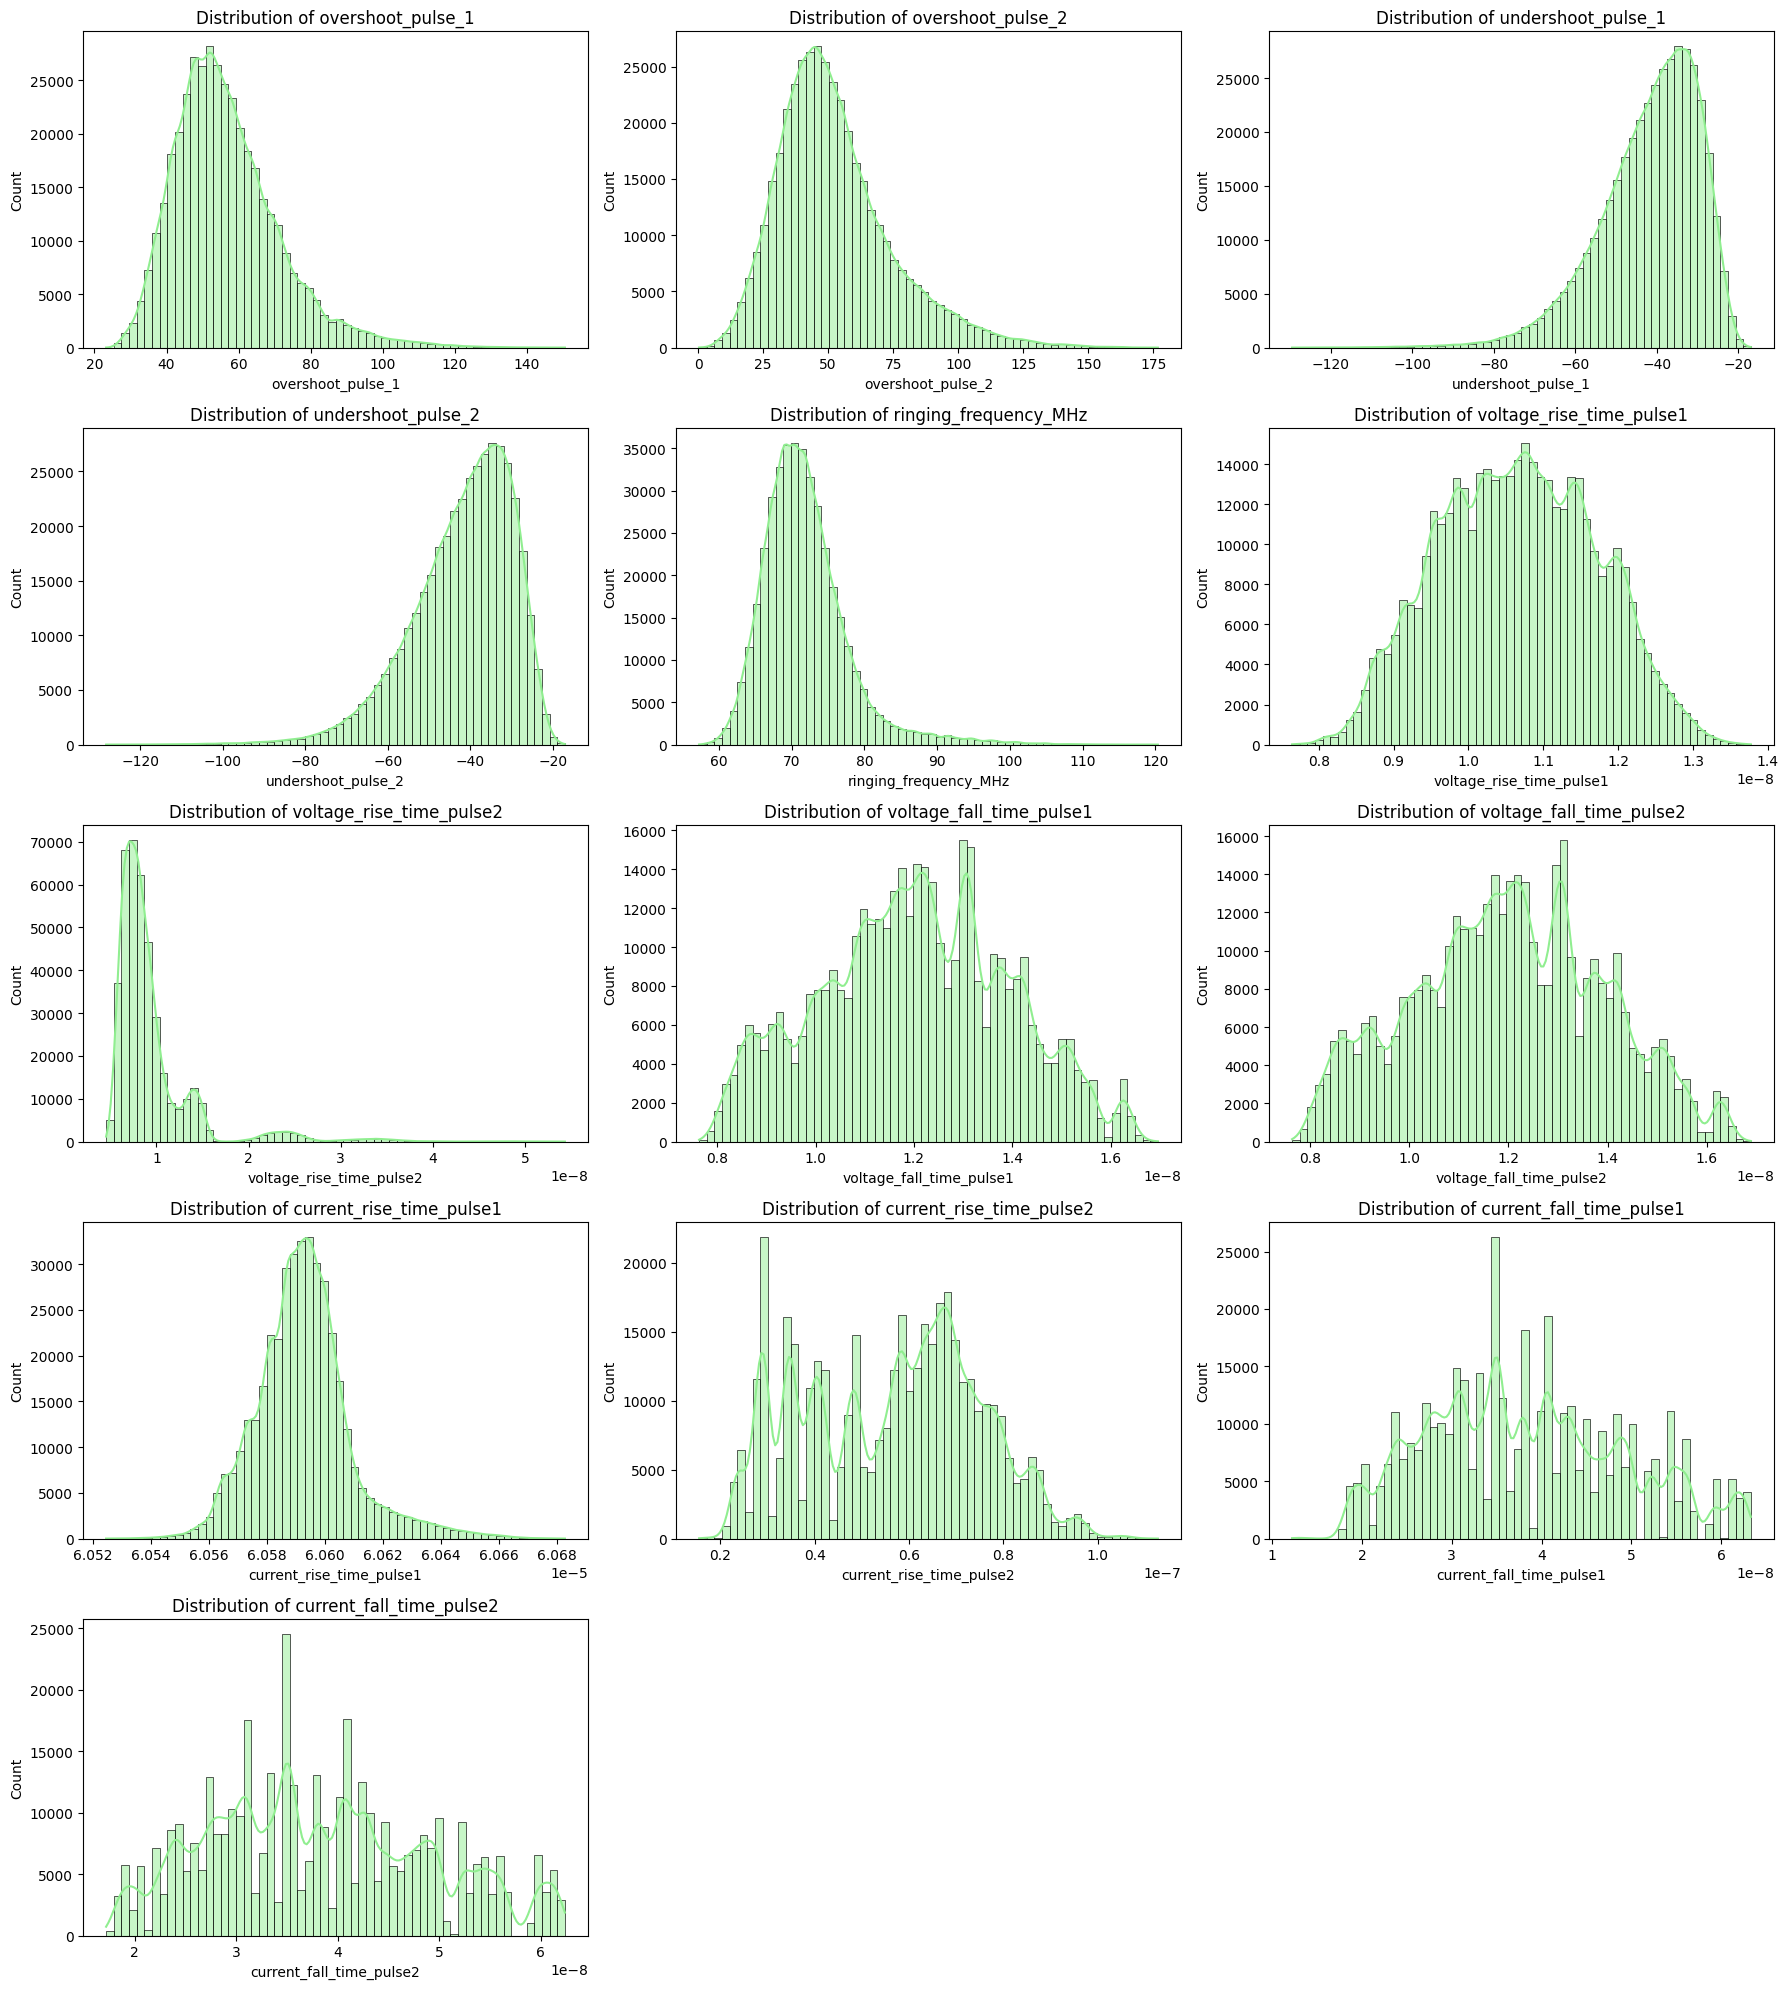

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# EMI target columns
target_columns = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz',
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2',
]
df_filtered = df_cleaned.copy()
# negative values (should not exist for rise/fall, freq, overshoot)
null_counts = df_filtered[target_columns].isnull().sum()
print("Null Value Count Per Target Column:")
print(null_counts[null_counts > 0])

rise_fall_columns = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2',
]

check_negative = df_filtered[rise_fall_columns].lt(0)
negative_counts = check_negative.sum()
print("\nNegative Value Count (Rise/Fall Columns Only):")
print(negative_counts[negative_counts > 0])  # Show only problematic ones

#IQR-based outliers
outlier_stats = {}
for col in target_columns:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_filtered[(df_filtered[col] < lower) | (df_filtered[col] > upper)]
    
    outlier_stats[col] = {
        'min': df_filtered[col].min(),
        'max': df_filtered[col].max(),
        'iqr_lower': lower,
        'iqr_upper': upper,
        'outliers': len(outliers),
        'range': df_filtered[col].max() - df_filtered[col].min()
    }

summary_df = pd.DataFrame(outlier_stats).T
print("\nFinal IQR-based Outlier Summary:")
display(summary_df)

# Final plottings
n_cols = 3
n_rows = (len(target_columns) + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(target_columns):
    sns.histplot(df_filtered[col], bins=60, kde=True, ax=axs[i], color='lightgreen')
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Count")

# Hide unused subplots
for j in range(len(target_columns), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


In [9]:
df_filtered.to_csv('mosfets_step3_final_cleaned/C2M0080120D_cleaned.csv', index=False)
print("Saved to: mosfets_step3_final_cleaned/C2M0080120D_cleaned.csv")

Saved to: mosfets_step3_final_cleaned/C2M0080120D_cleaned.csv
